<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.6.0


Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Pixel values are between 0 and 255, 0 being black and 255 white (grey-scale image).

In [7]:
print(train_images.shape)
print(train_images[0,:])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

Labels are integers from 0 to 9.  Each represents a specific article of clothing.

In [9]:
train_labels[:12]  # First 12 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

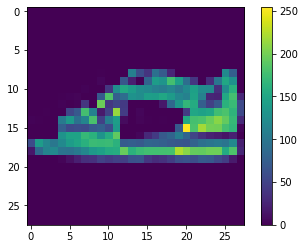

In [12]:
plt.figure()
plt.imshow(train_images[13])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the Model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Compile the Model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [15]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 3.0642 - accuracy: 0.6849
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7006 - accuracy: 0.7301
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6060 - accuracy: 0.7725
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5460 - accuracy: 0.8115
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8273
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4946 - accuracy: 0.8335
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4861 - accuracy: 0.8348
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4822 - accuracy: 0.8389
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4763 - accuracy: 0.8404
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.467

## Evaluate the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.8352
Test Accuracy: 0.8352000117301941


## Make a Prediction

[[4.68749133e-20 2.86601560e-14 0.00000000e+00 ... 5.77963926e-02
  1.65210219e-17 9.15820122e-01]
 [6.22958061e-04 1.56503532e-03 8.40389729e-01 ... 0.00000000e+00
  1.47343118e-04 7.87029036e-37]
 [3.16451509e-16 9.99999881e-01 4.06806450e-23 ... 0.00000000e+00
  6.35403127e-32 0.00000000e+00]
 ...
 [1.50961188e-10 1.09395265e-16 5.06354066e-31 ... 2.70200918e-30
  1.00000000e+00 4.99792727e-24]
 [1.22217554e-14 9.99986529e-01 0.00000000e+00 ... 0.00000000e+00
  1.53467207e-21 0.00000000e+00]
 [3.60596881e-17 5.25514626e-17 8.90625707e-09 ... 1.76862895e-01
  5.50598605e-03 3.03210635e-02]]
9
Ankle boot


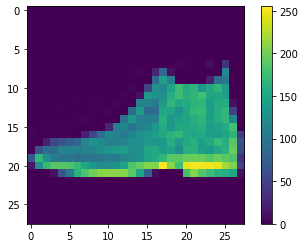

In [20]:
predictions = model.predict(test_images)
print(predictions)
# predictions = model.predict([test_images[0]])

print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Choose a number: 88


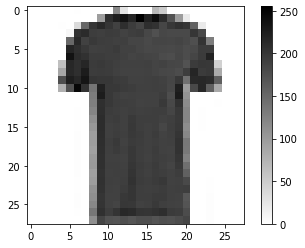

Correct label: T-shirt/top
Guessed label: T-shirt/top


In [36]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR 

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  # plt.title("Corrected label: " + label)
  # plt.xlabel("Guessed label: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Correct label: " + label)
  print("Guessed label: " + guess)

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def get_number():
  while True:
    num = input("Choose a number: ")
    if num.isdigit():
      num = int(num)
      if 0<=num<=1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)